# Random Sample Imputation
 ## Aim : Random Sample Imputation consists of taking random observation from the dataset and we use this observation to replace the Nan values.
 
 ## When should We use ?
     - It assumes that data are missing completely at random(MCAR)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('train.csv',usecols = ['Age','Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
# checking the null values.
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [23]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [159]:
# dropping the NAN values from the column of the dataset . 
print("Before dropping the NAN values from the column : ",df['Age'].shape)
print("After dropping the NAN values from the column : ",df['Age'].dropna().shape)

Before dropping the NAN values from the column :  (891,)
After dropping the NAN values from the column :  (714,)


In [176]:
# Just taking the random value from the dropped column of the NAN  values .
# The output keeps on change but without the NAN values has output.
df['Age'].dropna().sample()

542    11.0
Name: Age, dtype: float64

In [209]:
# Now selecting the a value from the new column which has no NAN values in it.Then replacing NAN values wit
  # some random value of the column.
# The values won't change after every running time.    
# The NAN values are filled with random values.
random = df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state = 0)

In [210]:
# getting the index of the NAN values in the column of the dataset . 
random.index = df[df['Age'].isnull()].index

In [211]:
# locating the random values for the NAN values in the dataset without distrubing other values.
df.loc[df['Age'].isnull(),'Age_random'] = random

In [212]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [215]:
def random_nan(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    ## It will have the random values to fill the NAN values in the column.
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## Pandas need to have the same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [216]:
median = df.Age.median()

In [217]:
random_nan(df,'Age',median)

In [218]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


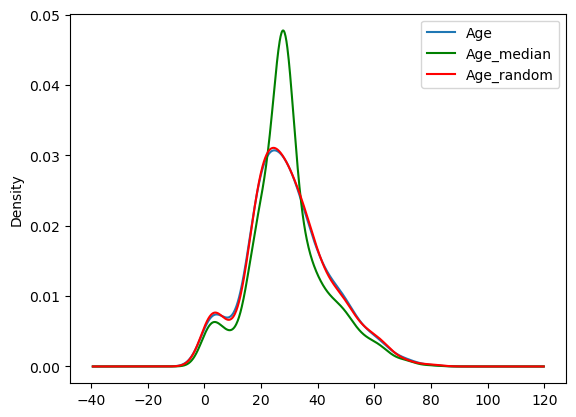

In [213]:
# checking the graph of the for both the values with NAN and without NAN.
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde',ax=ax)
df.Age_median.plot(kind = 'kde',ax=ax,color = 'green')
df.Age_random.plot(kind = 'kde',ax=ax,color = 'red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

## Advantages of Random Sample Imputation.
    - Easy to implement.
    - There is less distortion in Variance.
## Disadvantages of Random Sample Imputation.
    - Every situation the Randomness won't work.